# Assignment 2 - Machine Learning Basics

## Srishti Saha
Netid:  ss1078

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [134]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. **The sample size  𝑛  is extremely large, and the number of predictors  𝑝  is small.**- It would make the performance of a flexible statistical learning method **better** than an inflexible method as a large sample size will provide enough training points to help it fit better to the data. Moreover, with a higher number of examples, it will prevent overfitting.


2. **The number of predictors  𝑝  is extremely large, and the number of observations  𝑛  is small.**- It will make a flexible statistical learning method perform **worse** because it might overfit the observed data. Since there are not enough sample points or observations to represent using the high number of features available, a flexible model will add noise and be worse than an inflexible model.


3. **The relationship between the predictors and response is highly non-linear.**- Since there relationship will no longer be linear and will be a more complex (non-linear) relationship, a more flexible model will be **better** to represent this relationship depending on the kernel used. 


4. **The variance of the error terms, i.e.  $𝜎^2=𝑉𝑎𝑟(𝜖)$ , is extremely high.**- High variance of error terms will introduce high noise and overcome the underlying relationship of the data. A more flexible model will overfit to the variance of these error terms and will not fit well to the observed data. Thus, it will make a flexible model perform **worse** than an inflexible model.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

*(a)*
It is a **regression** problem with **inference**, because the target variable is salary which is a continuous numerical variable and the objective is to understand which factors affect the CEO salary. Here we have **n=500** samples (data from 500 top firms) and **p=3** features i.e. profit, number of employees and industry.

*(b)*
This is a **classification** problem with the objective being **prediction** as the target is a binary outcome i.e. if the product is a success or not and the aim is to predict the same for a newly launched product. Here, **n=20** as we have historical data from 20 similar products and **p=13** i.e. price charged for the product, marketing budget, competition price, and ten other variables.

*(c)*
It is a **regression** problem with **prediction**, as the target is % change in the US dollar which is a continuous numerical variable. Here, **n=52** as the data recorded is weekly data for 2012 (52 weeks) and **p=3** features namely, the % change in the US market, the % change in the British market, and the % change in the German market.

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [135]:
import numpy as np
import pandas as pd

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

df=pd.DataFrame(X)
df=df.rename(columns={ 0: "x1", 1: "x2", 2: "x3"})
df['y']= y
df['Obs']=[1,2,3,4,5,6]
df=df[['Obs','x1','x2','x3','y']]
df=df.set_index('Obs')
df

,x1,x2,x3,y
Obs,,,,
1,0,3,0,r
2,2,0,0,r
3,0,1,3,r
4,0,1,2,b
5,-1,0,1,b
6,1,1,1,r


**ANSWER**:

(a) Compute the Euclidean distance between each observation and the test point,  𝑥1=𝑥2=𝑥3=0 . Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers

In [136]:
## creating test reference point
test_pt= [0,0,0]

## using linalg.norm to compute euclidean distance
df['eucl']= np.around(np.linalg.norm(df[['x1', 'x2','x3']].sub(np.array(test_pt)), axis=1),3)

## answers
df

,x1,x2,x3,y,eucl
Obs,,,,,
1,0,3,0,r,3.000
2,2,0,0,r,2.000
3,0,1,3,r,3.162
4,0,1,2,b,2.236
5,-1,0,1,b,1.414
6,1,1,1,r,1.732


*(b)* What is our prediction with  𝐾=1 ? Why?

In [137]:
min_dist=min(df['eucl'])
pt_min_dist=df['eucl'].idxmin()
y_min_dist=df[df['eucl']==min_dist]['y'].values[0]
print('The point with least euclidean distance from the test point is obs:',pt_min_dist,'with a distance of',min_dist,'units and y value of:',y_min_dist,'.')

The point with least euclidean distance from the test point is obs: 5 with a distance of 1.414 units and y value of: b .


With $K=1$, we look for 1-nearest neighbor to the test point. That is point 5. We know that point 5 is blue. The two classes are red:'r' and blue:'b'. Thus the class-conditional probability for the test point is:

$x_o=Obs_5$

$P(test=r|X\in x_o)= 1/1 \sum (I(x_o=r))=0$

Similarly,
$P(test=b|X\in x_o)= 1/1 \sum (I(x_o=b))=1$

Thus, prediction with $K=1$ is **blue:'b'**.

*(c)* What is our prediction with  𝐾=3 ? Why?

With $K=3$, we look for 3-nearest neighbors to the test point. That is points: 2(r),5(b),6(r). The two classes are red:'r' and blue:'b'. Thus the class-conditional probability for the test point is:

$x_o=(Obs_2,Obs_5,Obs_6)$

$P(test=r|X\in x_o)= 1/3 \sum (I(x_o=r))=2/3$

Similarly,
$P(test=b|X\in x_o)= 1/3 \sum (I(x_o=b))=1/3$

Thus, prediction with $K=3$ is **red:'r'**. This is because of the three nearest neighbors, 2 are red.

*(d)* If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the best value of  𝐾  to be large or small? Why?

**K should be small** because this would make the model **flexible and increase the variance** which can address the highly non-linear Bayes decision boundary (the optimal decision boundary).

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [138]:
import numpy as np
import time
from statistics import mode

_(a) Build a working version of a binary kNN classifier using the skeleton code below._

In [139]:
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def _init_(self):
        self.X = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.X = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for i in range(len(x)):
            x_expanded = np.array([np.array(x.iloc[i])]*(len(self.X)))
            diff = np.subtract(self.X, x_expanded)
            dist = [sqx(i) for i in np.array(diff)]
            #dist = distance(self.X, x_expanded)
            sorted_index = np.argsort(dist)
            top_k = sorted_index[:k]
            y_hat.append(mode((self.y).iloc[top_k]))
        
        # Return the estimated targets
        return y_hat

def sqx(x):
    return sum([i**2 for i in x])
    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

_(b) Load the datasets to be evaluated here. Each includes training features ( 𝐗 ), and test features ( 𝐲 ) for both a low dimensional ( 𝑝=2  features/predictors) and a high dimensional ( 𝑝=100  features/predictors). For each of these datasets there are  𝑛=100  observations of each. They can be found in the data subfolder in the assignments folder on github. Each file is labeled similar to A2_X_train_low.csv, which lets you know whether the dataset is of features,  𝑋 , targets,  𝑦 ; training or testing; and low or high dimensions._

In [140]:
X_train_low = pd.read_csv("A2_X_train_low.csv", header=None)
y_train_low = pd.read_csv("A2_y_train_low.csv", header=None)[0]

X_test_low = pd.read_csv("A2_X_test_low.csv", header=None)
y_test_low = pd.read_csv("A2_y_test_low.csv", header=None)[0]

X_train_high = pd.read_csv("A2_X_train_high.csv", header=None)
y_train_high = pd.read_csv("A2_y_train_high.csv", header=None)[0]

X_test_high = pd.read_csv("A2_X_test_high.csv", header=None)
y_test_high = pd.read_csv("A2_y_test_high.csv", header=None)[0]

_(c) Train your classifier on first the low dimensional dataset and then the high dimensional dataset with  𝑘=5 . Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions._

In [141]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

knn1=Knn()
knn1.fit(X_train_low,y_train_low)
t_start1= time.time()
test_pred_low= knn1.predict(X_test_low,k=5)
t_end1=time.time() 
print("Time used on low dimensional dataset is:",round(t_end1-t_start1,4))
print("Accuracy on low dimensional test data is:",round(accuracy(y_test_low,test_pred_low)*100,2),"%")

Time used on low dimensional dataset is: 8.1685
Accuracy on low dimensional test data is: 92.5 %


In [142]:
knn2=Knn()
knn2.fit(X_train_high,y_train_high)
t_start2= time.time()
test_pred_high= knn2.predict(X_test_high,k=5)
t_end2=time.time() 
print("Time used on high dimensional dataset is:",round(t_end2-t_start2,4))
print("Accuracy on high dimensional test data is:",round(accuracy(y_test_high,test_pred_high)*100,2),"%")

Time used on high dimensional dataset is: 121.7498
Accuracy on high dimensional test data is: 99.3 %


_(d) Compare your implementation's accuracy and computation time to the scikit learn KNeighborsClassifier class. How do the results and speed compare?_

In [143]:
model_knn = KNeighborsClassifier(n_neighbors=5)

time11=time.time()
model_knn.fit(X_train_low,y_train_low)
pred_test_low=model_knn.predict(X_test_low)
score1 = accuracy_score(y_test_low,pred_test_low)
time12=time.time()
print("Time used on low dimensional dataset is:",round(time12-time11,4))
print("Accuracy on low dimensional test data is:",round(score1*100,2),"%")

Time used on low dimensional dataset is: 0.0481
Accuracy on low dimensional test data is: 92.5 %


In [144]:
model_knn2 = KNeighborsClassifier(n_neighbors=5)

time21=time.time()
model_knn2.fit(X_train_high,y_train_high)
pred_test_high=model_knn2.predict(X_test_high)
score2 = accuracy_score(y_test_high,pred_test_high)
time22=time.time()
print("Time used on low dimensional dataset is:",round(time22-time21,4))
print("Accuracy on low dimensional test data is:",round(score2*100,2),"%")

Time used on low dimensional dataset is: 0.4804
Accuracy on low dimensional test data is: 99.3 %


We see that the inbuilt KNeighbors classifier and the user defined class for KNN classifications hae the same accuracy. However, the inbuilt package is way faster than the user-defined function. 

* For low dimensional data, time difference is **7.99 seconds.**
* For high dimensional data, time difference is **119.78 seconds.**

_(e) Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?_

ANSWER:

Most computationally heavy models **consume a lot of machine resources**. This translates to requirements of a more sophisticated and expensive processor. This increases the cost of operation.

Moreover, a lot of enterprise grade ML applications, require **real-time analysis** for which these slow performing models are not helpful. To keep these models updated, we need to train them regularly and hence, that can be a hurdle.

These model will also take a long of time for **training on bigger (high-dimensional) datasets** as seen in the example above. This increases the time of execution exponentially with increasing size of data. This is a potential problem as well, as most of the real-world data is high-dimensional and has high volume.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [145]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import random
from matplotlib.colors import ListedColormap

_(a) Create a synthetic dataset (with both features and targets). Use the make_moons module with the parameter noise=0.35 to generate 1000 random samples._

In [146]:
# Create a synthetic dataset (with both features and targets)
raw_data=datasets.make_moons(n_samples=1000, noise=0.35)
X, y = raw_data

_(b) Scatterplot your random samples with each class in a different color_

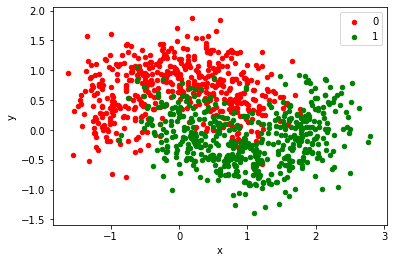

In [147]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
# defining colors for each class
colors = {0:'red', 1:'green' }
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


_(c) Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with:  𝑘={1,25,50} . This will result in 9 combinations (3 datasets, with 3 trained classifiers)._

In [148]:
# 3 random models
sample1=df.sample(n=100, random_state=1) #dataset1
sample2=df.sample(n=100, random_state=2) #dataset2
sample3=df.sample(n=100, random_state=3) #dataset3

# k-values
k1=1;k2=25;k3=50

# defining models using the above k-values
model1 = KNeighborsClassifier(n_neighbors=k1)
model2 = KNeighborsClassifier(n_neighbors=k2)
model3 = KNeighborsClassifier(n_neighbors=k3)

# storing models, their corresponding descriptions and the 3 datasets in arrays
classifiers= [model1,model2,model3]
desc=['KNN with k=1','KNN with k=25','KNN with k=50']
dataset= [sample1,sample2,sample3]

#fit each model to each dataset- 3x3 model fits
features1=list(zip(sample1['x'],sample1['y']))
label1= list(sample1['label'])
model1.fit(features1,label1)
model2.fit(features1,label1)
model3.fit(features1,label1)

features2=list(zip(sample2['x'],sample2['y']))
label2= list(sample2['label'])
model1.fit(features2,label2)
model2.fit(features2,label2)
model3.fit(features2,label2)

features3=list(zip(sample3['x'],sample3['y']))
label3= list(sample3['label'])
model1.fit(features3,label3)
model2.fit(features3,label3)
model3.fit(features3,label3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

_(d) For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from Introduction to Statistical Learning). Each column should represent a different value of  𝑘  and each row should represent a different dataset_

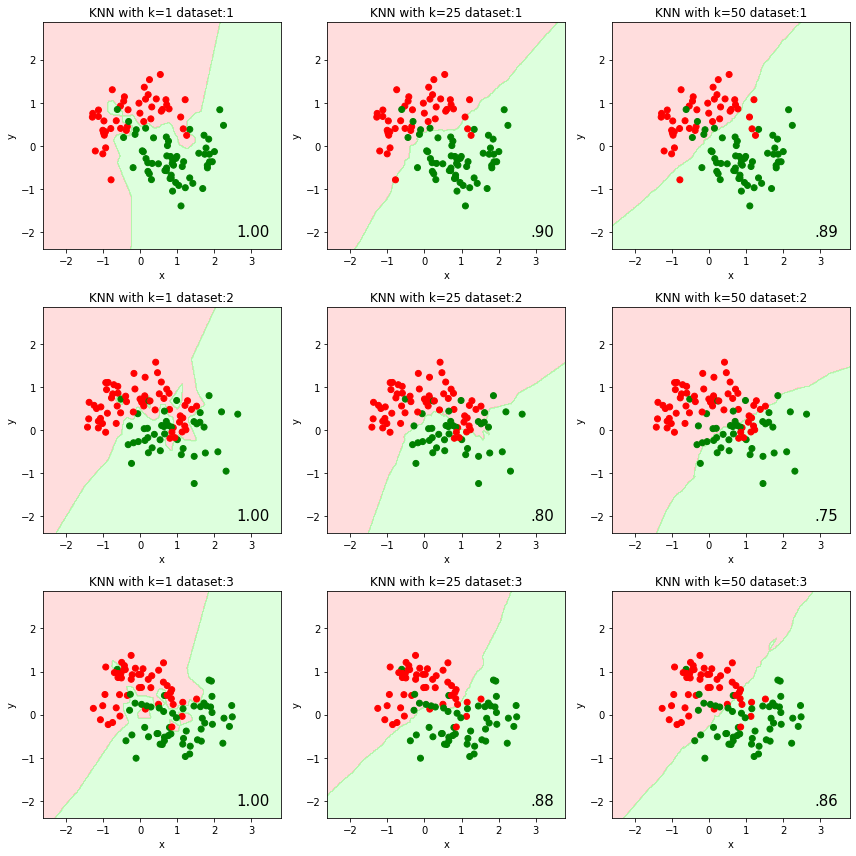

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [149]:
h=0.02
colors = ['red','green']
#figure = plt.figure(figsize=(100, 100))
fig, ax = plt.subplots(3,3,figsize=(12,12))
i = 1
plot_col=0
plot_row=0
# iterate over datasets
for ds_cnt, ds in enumerate(dataset):
    #ax = plt.subplot(len(dataset), len(classifiers) + 1, i)
    features=list(zip(ds['x'],ds['y']))
    label= list(ds['label'])
    for des, clf in zip(desc, classifiers):
        
        #figure = plt.figure(figsize=(25, 12))
        #ax = plt.subplot(len(dataset), len(classifiers) + 1, i)
        clf.fit(features,label)
        score = clf.score(features,label)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.figure()
        # Create color maps
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
        #print(plot_row,",",plot_col)
        ax[plot_row,plot_col].contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
        ax[plot_row,plot_col].scatter(ds['x'],ds['y'],c=ds['label'],cmap=matplotlib.colors.ListedColormap(colors))
        ax[plot_row,plot_col].set_title(des+" dataset:"+str(ds_cnt+1))
        ax[plot_row,plot_col].set_xlim(xx.min(), xx.max())
        ax[plot_row,plot_col].set_ylim(yy.min(), yy.max())
        ax[plot_row,plot_col].set_xlabel("x")
        ax[plot_row,plot_col].set_ylabel("y")
        ax[plot_row,plot_col].text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
        if plot_col==2:
            plot_col=0
        else:
            plot_col+=1
    plot_row+=1
        
fig.tight_layout()
plt.show()

_(e) What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?_


ANSWER:

The decision boundary corresponding to low k-values separate the data the best as there are no errors. As k increases, the model accuracy score decreases as the variance of the boundary decreases. 

Boundaries corresponding to **low values of k have high variance and high flexibility and will vary the most as the data change**. Boundaries corresponding to high values of k have less variance and will vary the least as the data change.

_(f) Explain the bias-variance tradeoff using the example of the plots you made in this exercise._

ANSWER:

In the plots above, we see that as k increases, the decision boundary becomes more and more linear with lower variance (variation). This is because a high value of k decreases the flexibility of the model and increases the bias of the model. As a result, as k increases there might be a few points that might be misclassified in the (train) data due to high bias. We see that above which is corroborated by the decreasing accuracy scores corresponding to high k values. Howevere, sucha  model is more generalizable for unobserved or test data, and is thus preferable

However, as we see above plots with low values of k have a high accuracy score and the decision boundary has a lot of variance i.e. high variance. It has completely overfit to the observed data. It has a low bias and is expected to underperform when tested on unobserved (test) data. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [150]:
from sklearn.metrics import accuracy_score

_(a) Using the function created earlier to generate random samples (using the make_moons function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set._

In [151]:
#train data
X_train, y_train = raw_data

# test data
test_data=datasets.make_moons(n_samples=1000, noise=0.35)
X_test, y_test = test_data

_(b) Train a kNN classifier on your training set for  𝑘=1,2,...500 . Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints)._

In [152]:
# generate a list of 500 k values
k_neigh= list(range(1,501))

In [153]:
# defining empty arrays for storing model results and error rates
error_rate_train=[]
error_rate_test=[]
pred_train=[]
pred_test=[]

#pply each of these trained classifiers to both training dataset and your test datase
for k in k_neigh:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_train=model.predict(X_train)
    error_rate_train.append((1-accuracy_score(y_train,pred_train)))
    pred_test=model.predict(X_test)
    error_rate_test.append((1-accuracy_score(y_test,pred_test)))


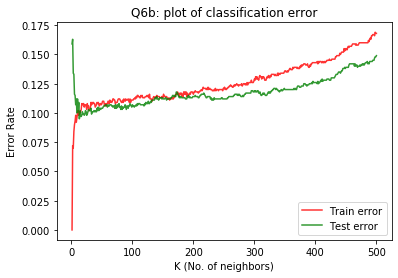

In [154]:
# plot the error rates as a function of k
plt.plot(k_neigh,error_rate_train, c='red',alpha=0.8,label='Train error')
plt.plot(k_neigh,error_rate_test, c='green',alpha=0.8,label='Test error')
plt.xlabel('K (No. of neighbors)')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Q6b: plot of classification error')
plt.show()

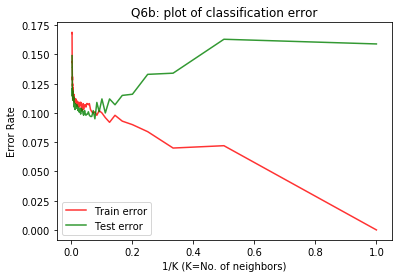

In [155]:
# create a vector of 1/k
k_inv= [1/k for k in k_neigh]

# plot the error rates as a function of 1/k
plt.plot(k_inv,error_rate_train, c='red',alpha=0.8,label='Train error')
plt.plot(k_inv,error_rate_test, c='green',alpha=0.8,label='Test error')
plt.xlabel('1/K (K=No. of neighbors)')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Q6b: plot of classification error')
plt.show()

_Answer (c):_

The following observation are made:
* The classification error rate on the train data seems to increase sharply for the first few values of k and then increases gradually as the value of k (i.e. the number of neighbors) increases further.
* The classification error rate on the test data seems to decrease rapidly first and then increases gradually as the value of k (i.e. the number of neighbors) increases.

_Answer (d):_

1. **high bias**: A high value of K represents high bias, low variance and low flexibility

2. **high variance**: A low value of K represents low bias, high variance and high flexibility

This is corroborated by the point that models with high K values have comparatively better test error rates in the above example.

_(e) What is the optimal value of  𝑘  and why?_

The optimum value of k will be the one that provides the lowest misclassification rate in the test data. To find tat, we will simply find the k value corresponding to the minimum test misclassification (error) rate in our case.

In [156]:
opt_val_k_test= k_neigh[error_rate_test.index(min(error_rate_test))]
print("The optimum value of k, based on min test error rate is:",opt_val_k_test)

The optimum value of k, based on min test error rate is: 13


_Answer (f):_

Every model has its own hyperparameters that allow us to tune the models' flexibility and in turn its bias and variance. For instance, the learning rate in a Linear Regression model is a hyperparameter and can affect the flexibility of the model.

Moreover, the number of features in a dataset (i.e. the dimensions of the data) can also affect the flexibility of the model. A large number of features generally tend to make a model flexible.

Some other factors that can affect the flexibility of a model are:
* sample size of the data
* linearity of the relationship between y and x, and the representation of this relationship using the model- If the model has been designed to fit to the actual relationship of the observed data perfectly, it will be flexible. However, it might perform well for unobserved data.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

_(a) Create a scatter plot of your training data._

In [158]:
train_df= pd.read_csv("A2_Q7_train.csv", usecols=("x","y"))
test_df=pd.read_csv("A2_Q7_test.csv", usecols=("x","y"))
train_df.head()

,x,y
0,-0.254599,45.835580
1,5.507143,68.448152
2,3.319939,-0.951031
3,1.986585,-4.024992
4,-2.439814,-16.374826


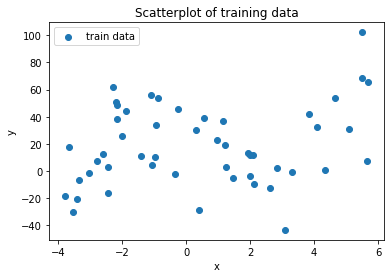

In [159]:
plt.scatter(train_df['x'],train_df['y'],label='train data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of training data")
plt.legend()

_(b) Estimate a linear regression model ( 𝑦=𝑎0+𝑎1𝑥 ) for the training data and calculate both the  𝑅2  value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g.  𝑦=𝑎0+𝑎1𝑥 , but with the estimated coefficients inserted._

In [160]:
model_lr=LinearRegression()
#train_df.x
model_lr.fit(np.array(train_df['x']).reshape(-1,1),train_df['y'])
y_pred=model_lr.predict(np.array(train_df['x']).reshape(-1,1))

In [161]:
r2_train=r2_score(train_df['y'], y_pred) # 6.49%
mse_train= mean_squared_error(train_df['y'],y_pred) #791.416 

print("The R-square score on train data is:",round(r2_train*100,2),"% and the MSE on train data is:",round(mse_train,4))

The R-square score on train data is: 6.49 % and the MSE on train data is: 791.4167


In [162]:
print("Model Intercept" ,model_lr.intercept_ , "and Model's x-coefficient", model_lr.coef_)

Model Intercept 17.204928179405222 and Model's x-coefficient [2.59072826]


The equation of the model is: $y= 17.20+ 2.59*x$.
* $R^2= 6.49$%
* $MSE=791.42$

_c) If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable,  𝑥  that may make sense for these data. This will be a multiple regression model of the form  𝑦=𝑎0+𝑎1𝑥1+𝑎2𝑥2+…+𝑎𝑛𝑥𝑛 . Here  𝑥𝑖  could be any transformations of x - perhaps it's  1𝑥 ,  𝑙𝑜𝑔(𝑥) ,  𝑠𝑖𝑛(𝑥) ,  𝑥𝑘  (where  𝑘  is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be  𝑥1=𝑥  and  𝑥2=𝑙𝑜𝑔(𝑥) , your model would be of the form  𝑦=𝑎0+𝑎1𝑥+𝑎2𝑙𝑜𝑔(𝑥) . Also provide the  𝑅2  and mean square error of the fit for the training data._

In [163]:
X_train= pd.DataFrame(train_df['x'])
y_train=np.array(train_df['y'])
#Feature transformation
X_train['sinx']= [np.sin(x) for x in X_train['x']]
#X_train['logx']= [np.log1p(x) for x in X_train['x']] # since it has negative values, it will return nans
X_train['xcube']= [x**3 for x in X_train['x']]

We choose the **cube transformation** as the training data seems to follow a cubic trend- it might fit well to a cubic curve. The **sine curve** might help tailor the curve to the sinusoidal curve-like pattern that can be seen slightly in the training dtaa

In [164]:
model_lr2=LinearRegression()
#fir model oon transformed features
model_lr2.fit(X_train,y_train)
y_pred2=model_lr2.predict(X_train)

In [165]:
r2_train2=r2_score(y_train, y_pred2) # 6.49%
mse_train2= mean_squared_error(y_train,y_pred2) #791.416 
#r2_train2 #31.98%
#mse_train2 #575.659
print("The R-square score on train data is:",round(r2_train2*100,2),"% and the MSE on train data is:",round(mse_train2,4))

The R-square score on train data is: 31.98 % and the MSE on train data is: 575.6592


In [166]:
print("Model Intercept" ,model_lr2.intercept_ , "and Model's x-coefficient", model_lr2.coef_)

Model Intercept 12.70320278324965 and Model's x-coefficient [ -2.26867004 -11.2926168    0.28294911]


The equation of the model is: $y= 12.70- 2.27*x-11.29*sin(x)+0.28*x^3$.
* $R^2= 31.98$%
* $MSE=575.66$

_(d) Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line)._

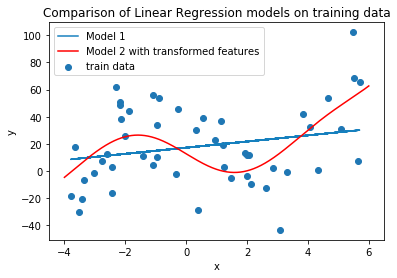

In [167]:
r=np.linspace(-4,6,5000)

plt.scatter(train_df['x'],train_df['y'],label='train data')
plt.plot(train_df['x'], (17.20)+(2.27*train_df['x']),c="#1680BE", label='Model 1')
plt.plot(r, (12.70)-(2.27*r)-(11.29*np.sin(r))+(0.28*r**3),c="red", label='Model 2 with transformed features')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Linear Regression models on training data")
plt.legend()

_(e) Using the models above, apply them to the test data and estimate the  𝑅2  and mean square error of the test dataset._

In [168]:
X_test= pd.DataFrame(test_df['x'])
y_test=np.array(test_df['y'])

In [169]:
y_pred_test1=model_lr.predict(X_test)

In [170]:
#Feature transformation
X_test['sinx']= [np.sin(x) for x in X_test['x']]

X_test['xcube']= [x**3 for x in X_test['x']]

In [171]:
y_pred_test2=model_lr2.predict(X_test)

In [174]:
r2_test1=r2_score(y_test, y_pred_test1) #
mse_test1= mean_squared_error(y_test,y_pred_test1) #116.66 
r2_test2=r2_score(y_test, y_pred_test2) #
mse_test2= mean_squared_error(y_test,y_pred_test2) #1002.59
print("The R-square score on test data using model 1 is:",round(r2_test1*100,2),"% and the MSE on test data is:",
      round(mse_test1,4))
print("The R-square score on test data using model 2 is:",round(r2_test2*100,2),"% and the MSE on test data is:",
      round(mse_test2,4))

The R-square score on test data using model 1 is: -13.29 % and the MSE on test data is: 1116.6632
The R-square score on test data using model 2 is: -1.72 % and the MSE on test data is: 1002.5871


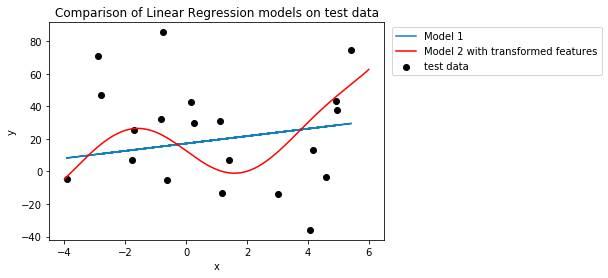

In [173]:
plt.scatter(test_df['x'],test_df['y'],label='test data',c="k")
plt.plot(test_df['x'], (17.20)+(2.27*test_df['x']),c="#1680BE", label='Model 1')
plt.plot(r, (12.70)-(2.27*r)-(11.29*np.sin(r))+(0.28*r**3),c="red", label='Model 2 with transformed features')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Linear Regression models on test data")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

_Answer (f):_

The second model with transformed features performs better on the trainig data as it fits well on to the observed data points. This conclusion is corroborated by the higher $R^2 score$ of the second model on the training data and the lower MSE score on the training data, when compared to the first model (without transformations). This is because the model has been tailored to fit well to the traiing data. The higher number of parameters in the second model lend a high variance to the model and make it flexible. The first model has low flexibility (and low variance) which canot capture the variance of the actual observed data.

For the test data, the second model performs better as it has a lower MSE. This is because the test data is similar to the training data.

_Answer (g):_

If the test data were significantly different from the training dataset, the second model would not be able to fit well on to the unobserved data and thus, might give worse predictions. This is because the second model has high variance that has been fit on to the observed data. Any other trend would not be captured well.

The first model with low variance but high bias might fit better in that case.